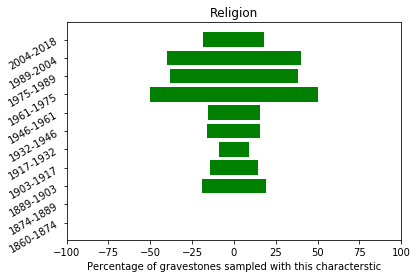

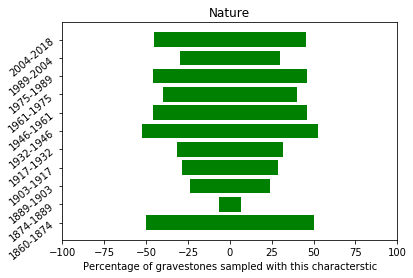

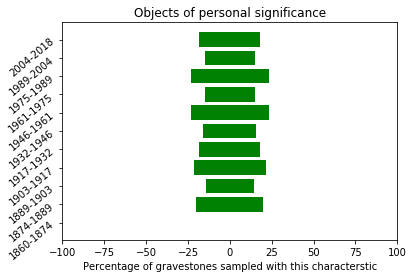

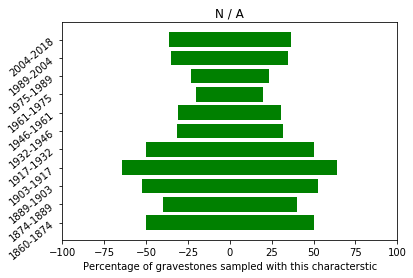

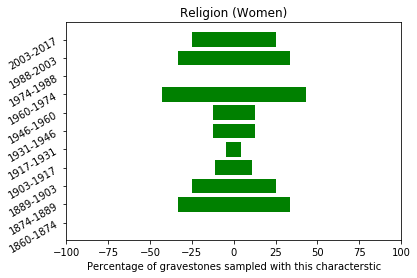

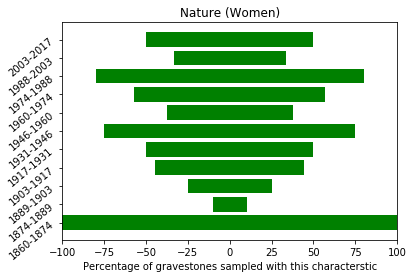

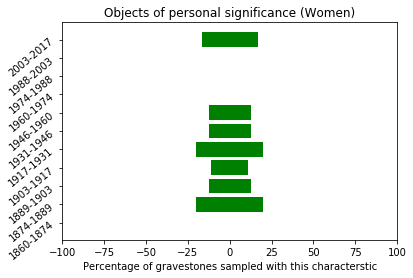

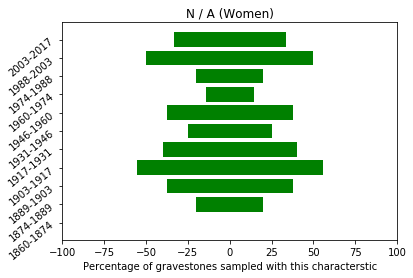

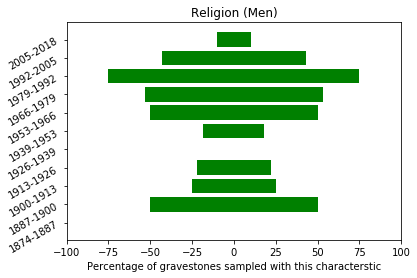

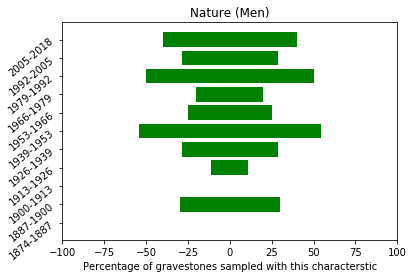

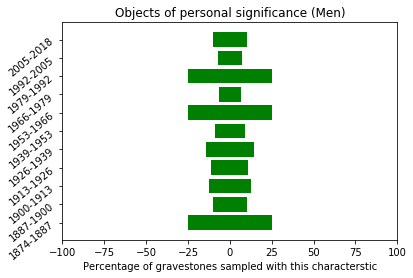

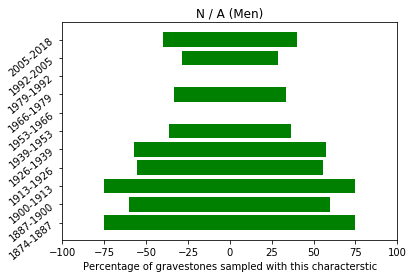

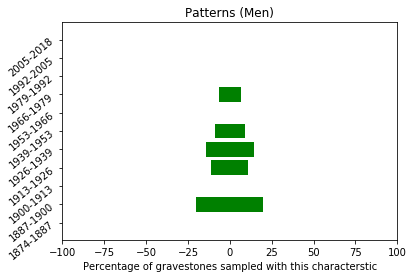

In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt

year = []
age = []
sex = []
religion = []
nature = []
na = []
objects = []
pattern = []

f_csv = open( 'symbolsnew1.csv', 'r')
readf = csv.reader( f_csv, delimiter = ',')
for row in readf:
    year.append(row[0])
    age.append(row[1])
    sex.append(row[2])
    religion.append(row[4])
    nature.append(row[5])
    na.append(row[6])
    objects.append(row[7])
    pattern.append(row[8])
f_csv.close()

input_data = [year, age, sex, religion, nature, na, objects, pattern]

#women
yearf = []
agef = []
sexf = []
religionf = []
naturef = []
naf = []
objectsf = []
patternf = []

for i in range(len(sex)):
    if sex[i] == 'F' or sex[i] == 'F ':
        yearf.append(year[i])
        agef.append(age[i])
        religionf.append(religion[i])
        naturef.append(nature[i])
        naf.append(na[i])
        objectsf.append(objects[i])
        patternf.append(pattern[i])
    else:
        continue

input_data_f = [yearf, agef, sexf, religionf, naturef, naf, objectsf, patternf]

#men
yearm = []
agem = []
sexm = []
religionm = []
naturem = []
nam = []
objectsm = []
patternm = []

for i in range(len(sex)):
    if sex[i] == 'M' or sex[i]=='M ':
        yearm.append(year[i])
        agem.append(age[i])
        religionm.append(religion[i])
        naturem.append(nature[i])
        nam.append(na[i])
        objectsm.append(objects[i])
        patternm.append(pattern[i])
    else:
        continue

input_data_m = [yearm, agem, sexm, religionm, naturem, nam, objectsm, patternm]

def data_transform_symbols(input_data, bins):
    '''returns a seriation graph for the given data.
    Inputs:
        data: (array of your data) 
        increment: size of bins for seriation
        
    Output: data in proper format for seriation function'''
    
    year = input_data[0]
    for i in range(len(year)):
        year[i] = float(year[i])
    year = np.array(year)
    religion = input_data[3]
    nature = input_data[4]
    na = input_data[5]
    objects = input_data[6]
    pattern = input_data[7]
    
    data = []
    bounds = np.linspace(float(year[0]), float(year[-1]), bins)
    
    for i in range(len(bounds)-1):
        start = []
        count = []
        end = []
        for yr in year:
            if yr < bounds[i]:
                start.append(0)
            if yr >= bounds[i] and yr <= bounds[i+1]:
                count.append(0)
            if yr <= bounds[i+1]:
                end.append(0)
        
        religionb = religion[len(start): len(end)]
        for n in range(len(religionb)):
            religionb[n] = float(religionb[n])
        
        natureb = nature[len(start): len(end)]
        for n in range(len(natureb)):
            natureb[n] = float(natureb[n])
        
        nab = na[len(start): len(end)]
        for n in range(len(nab)):
            nab[n] = float(nab[n])
        
        objectsb = objects[len(start): len(end)]
        for n in range(len(objectsb)):
            objectsb[n] = float(objects[n])
        
        patternb = pattern[len(start): len(end)]
        for n in range(len(patternb)):
            patternb[n] = float(patternb[n])
        
        religionc = sum(religionb)
        naturec = sum(natureb)
        nac = sum(nab)
        objectsc = sum(objectsb)
        patternc = sum(patternb)
        #total = religionc + naturec + nac + objectsc + patternc
        total = len(count)
        
        religionp = (religionc/total)*100
        naturep = (naturec/total)*100
        nap = (nac/total)*100
        objectsp = (objectsc/total)*100
        patternp = (patternc/total)*100
        
        data_bound = ['{:.0f}-{:.0f}'.format(bounds[i], bounds[i+1]), religionp, naturep, nap, objectsp, patternp, total]
        data.append(data_bound)
        
    return data
            
data = data_transform_symbols(input_data, 12)

labels = []
religion = []
nature = []
objects = []
na = []
pattern = []
totals = []
for d in data:
    religion.append(d[1])
    nature.append(d[2])
    labels.append(d[0])
    objects.append(d[4])
    pattern.append(d[5])
    na.append(d[3])
    totals.append(d[6])
    


#religion
plt.barh(range(len(religion)), np.array(religion)*2, left = np.array(religion)*-1, align='center', color='green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 30)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Religion')
plt.xlim(-100, 100)
plt.savefig('religionsymbol.png')

#nature
plt.figure()
plt.barh(range(len(nature)), np.array(nature)*2, left = np.array(nature)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Nature')
plt.xlim(-100, 100)
plt.savefig('naturesymbol.png')

#objects of personal significance
plt.figure()
plt.barh(range(len(objects)), np.array(objects)*2, left = np.array(objects)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Objects of personal significance')
plt.xlim(-100, 100)
plt.savefig('objectsymbol.png')

#na
plt.figure()
plt.barh(range(len(na)), np.array(na)*2, left = np.array(na)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('N / A')
plt.xlim(-100, 100)
plt.savefig('nasymbol.png')

#patterns
plt.figure()
plt.barh(range(len(pattern)), np.array(pattern)*2, left = np.array(pattern)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Patterns')
plt.xlim(-100, 100)
plt.savefig('patternsymbol.png')


#writing data into files
f_csv1 = open( 'symbolsdata.csv', 'w')
SAWriter = csv.writer( f_csv1,                 
                           delimiter = ',',          
                           quotechar = '',           
                           quoting = csv.QUOTE_NONE )
SAWriter.writerow(['Symbols Data'])
SAWriter.writerow(['Year Range', 'Number Sampled', 'Religion Percentage', 'Nature Percentage', 'Objects Percentage', 'N/A Percentage', 'Patterns Percentage'])
for i in range(len(labels)):
    SAWriter.writerow( [labels[i], totals[i], religion[i], nature[i], objects[i], na[i], pattern[i]] )
f_csv1.close()

#women
dataf = data_transform_symbols(input_data_f, 12)

labels = []
religion = []
nature = []
objects = []
na = []
pattern = []
totals = []
for d in dataf:
    religion.append(d[1])
    nature.append(d[2])
    labels.append(d[0])
    objects.append(d[4])
    pattern.append(d[5])
    na.append(d[3])
    totals.append(d[6])
    

#religion
plt.barh(range(len(religion)), np.array(religion)*2, left = np.array(religion)*-1, align='center', color='green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 30)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Religion (Women)')
plt.xlim(-100, 100)
plt.savefig('religionsymbol_women.png')

#nature
plt.figure()
plt.barh(range(len(nature)), np.array(nature)*2, left = np.array(nature)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Nature (Women)')
plt.xlim(-100, 100)
plt.savefig('naturesymbol_women.png')

#objects of personal significance
plt.figure()
plt.barh(range(len(objects)), np.array(objects)*2, left = np.array(objects)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Objects of personal significance (Women)')
plt.xlim(-100, 100)
plt.savefig('objectsymbol_women.png')

#na
plt.figure()
plt.barh(range(len(na)), np.array(na)*2, left = np.array(na)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('N / A (Women)')
plt.xlim(-100, 100)
plt.savefig('nasymbol_women.png')

#patterns
plt.figure()
plt.barh(range(len(pattern)), np.array(pattern)*2, left = np.array(pattern)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Patterns (Women)')
plt.xlim(-100, 100)
plt.savefig('patternsymbol_women.png')

#Men
datam = data_transform_symbols(input_data_m, 12)

labels = []
religion = []
nature = []
objects = []
na = []
pattern = []
totals = []
for d in datam:
    religion.append(d[1])
    nature.append(d[2])
    labels.append(d[0])
    objects.append(d[4])
    pattern.append(d[5])
    na.append(d[3])
    totals.append(d[6])
    


#religion
plt.barh(range(len(religion)), np.array(religion)*2, left = np.array(religion)*-1, align='center', color='green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 30)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Religion (Men)')
plt.xlim(-100, 100)
plt.savefig('religionsymbol_men.png')

#nature
plt.figure()
plt.barh(range(len(nature)), np.array(nature)*2, left = np.array(nature)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Nature (Men)')
plt.xlim(-100, 100)
plt.savefig('naturesymbol_men.png')

#objects of personal significance
plt.figure()
plt.barh(range(len(objects)), np.array(objects)*2, left = np.array(objects)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Objects of personal significance (Men)')
plt.xlim(-100, 100)
plt.savefig('objectsymbol_men.png')

#na
plt.figure()
plt.barh(range(len(na)), np.array(na)*2, left = np.array(na)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('N / A (Men)')
plt.xlim(-100, 100)
plt.savefig('nasymbol_men.png')

#patterns
plt.figure()
plt.barh(range(len(pattern)), np.array(pattern)*2, left = np.array(pattern)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Patterns (Men)')
plt.xlim(-100, 100)
plt.savefig('patternsymbol_men.png')



 

[  -0.         -100.          -50.          -22.22222222  -80.
  -25.           -0.           -0.           -0.           -0.
   -0.        ]


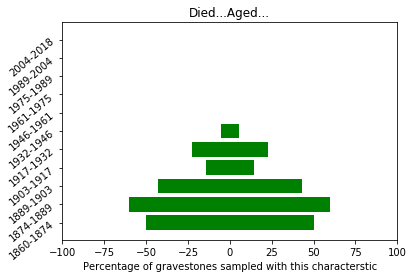

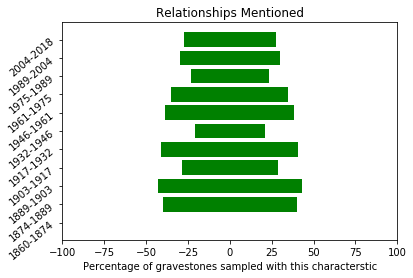

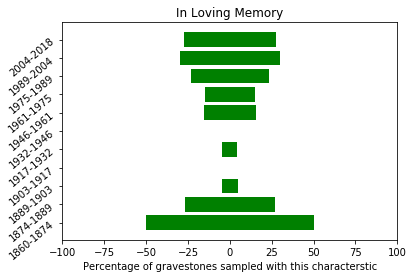

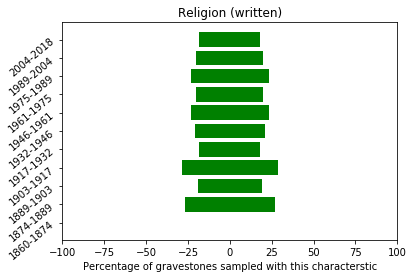

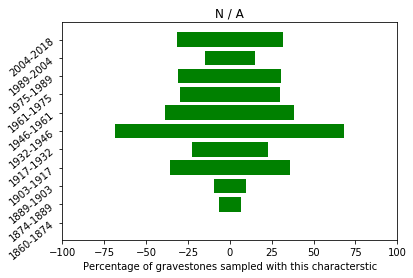

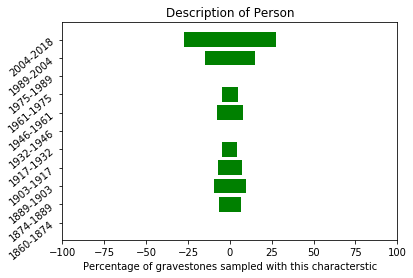

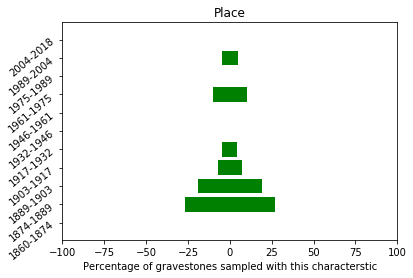

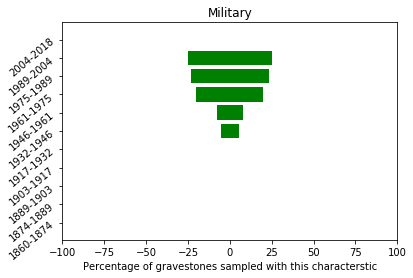

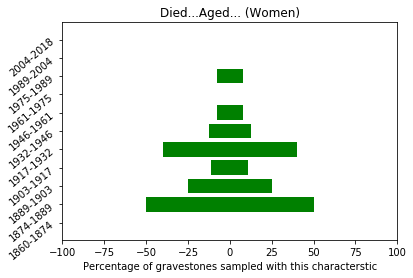

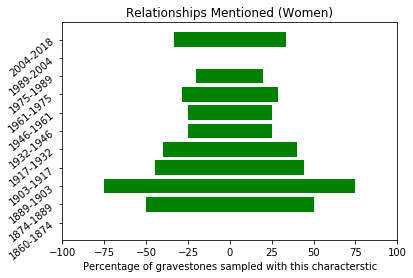

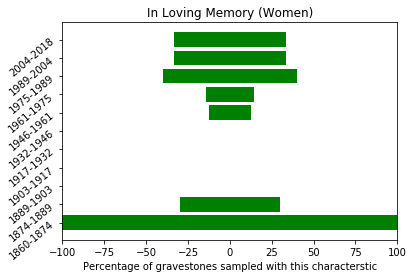

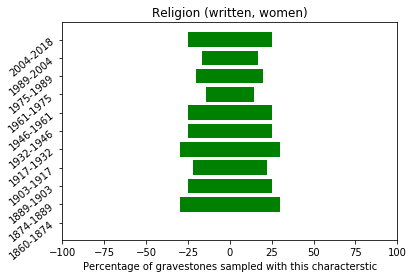

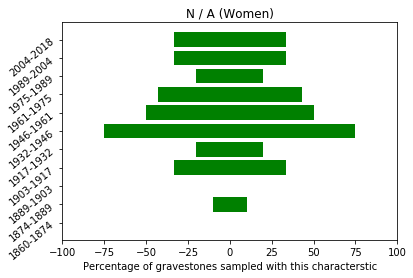

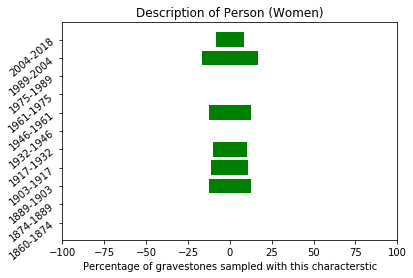

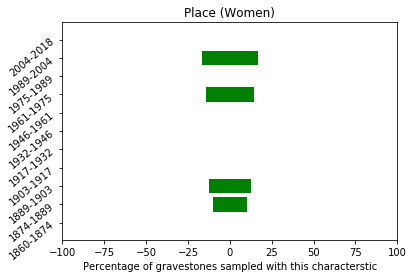

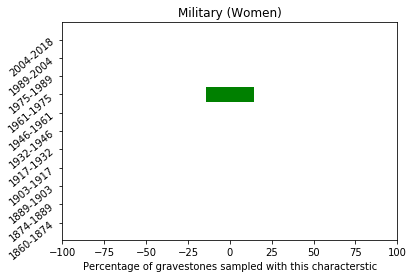

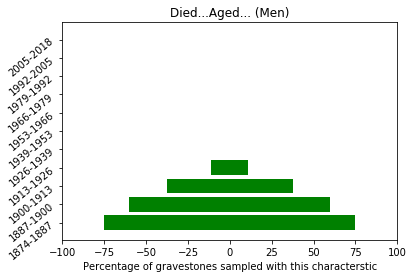

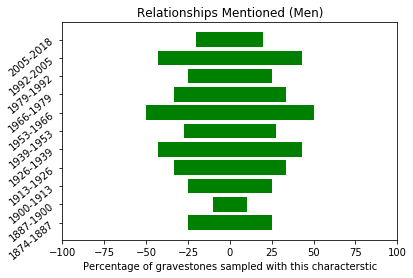

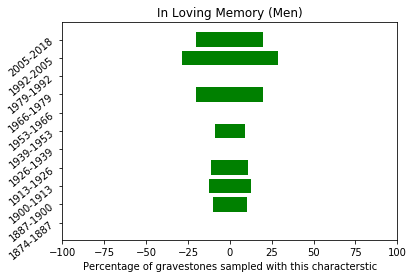

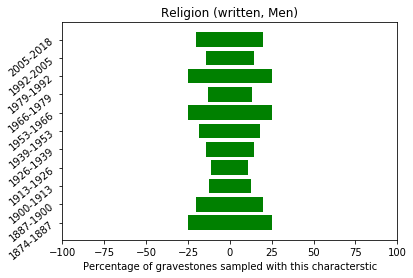

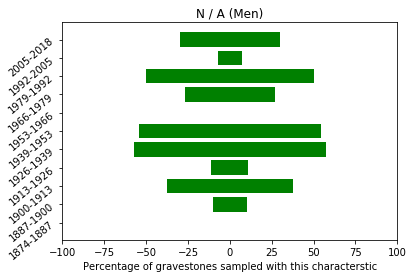

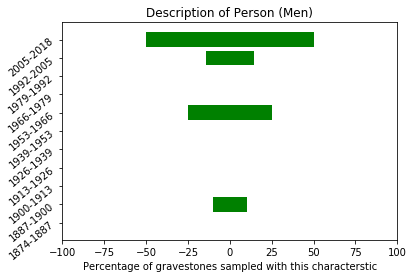

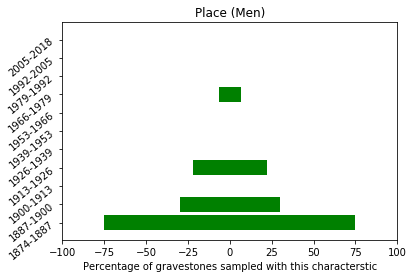

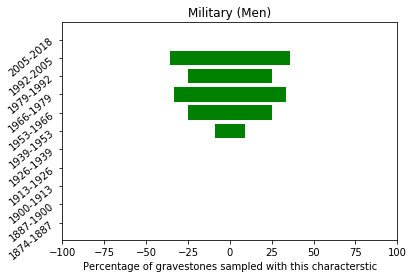

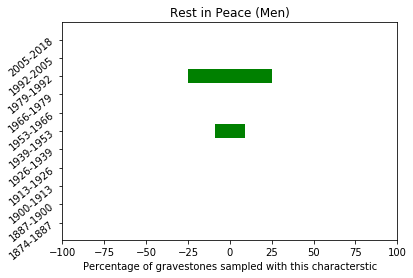

In [25]:
year = []
age = []
sex = []
da = []
relation = []
ilm = []
religion = []
na = []
desc = []
place = []
mil = []
rest = []

f_csv = open( 'content.csv', 'r')
readf = csv.reader( f_csv, delimiter = ',')
next(readf) # skip the header row
for row in readf:
    year.append(row[1])
    age.append(row[2])
    sex.append(row[3])
    da.append(row[4])
    relation.append(row[5])
    ilm.append(row[6])
    religion.append(row[7])
    na.append(row[8])
    desc.append(row[9])
    place.append(row[10])
    mil.append(row[11])
    rest.append(row[12])
f_csv.close()

input_data = [year, age, sex, da, relation, ilm, religion, na, desc, place, mil, rest]

#women
yearf = []
agef = []
sexf = []
daf = []
relationf = []
ilmf = []
religionf = []
naf = []
descf = []
placef = []
milf = []
restf = []

for i in range(len(sex)):
    if sex[i] == 'F' or sex[i]== 'F ':
        yearf.append(year[i])
        agef.append(age[i])
        daf.append(da[i])
        relationf.append(relation[i])
        ilmf.append(ilm[i])
        religionf.append(religion[i])
        naf.append(na[i])
        descf.append(desc[i])
        placef.append(place[i])
        milf.append(mil[i])
        restf.append(rest[i])
    else:
        continue

input_data_f = [yearf, agef, sexf, daf, relationf, ilmf, religionf, naf, descf, placef, milf, restf]

#men
yearm = []
agem = []
sexm = []
dam = []
relationm = []
ilmm = []
religionm = []
nam = []
descm = []
placem = []
milm = []
restm = []

for i in range(len(sex)):
    if sex[i] == 'M' or sex[i]== 'M ':
        yearm.append(year[i])
        agem.append(age[i])
        dam.append(da[i])
        relationm.append(relation[i])
        ilmm.append(ilm[i])
        religionm.append(religion[i])
        nam.append(na[i])
        descm.append(desc[i])
        placem.append(place[i])
        milm.append(mil[i])
        restm.append(rest[i])
    else:
        continue
        
input_data_m = [yearm, agem, sexm, dam, relationm, ilmm, religionm, nam, descm, placem, milm, restm]

    
def data_transform_content(input_data, bins):
    '''returns a seriation graph for the given data.
    Inputs:
        data: (array of your data) 
        increment: size of bins for seriation
        
    Output: data in proper format for seriation function'''
    
    year = input_data[0]
    for i in range(len(year)):
        year[i] = float(year[i])
    year = np.array(year)
    da = input_data[3]
    relation = input_data[4]
    ilm = input_data[5]
    religion = input_data[6]
    na = input_data[7]
    desc = input_data[8]
    place = input_data[9]
    mil = input_data[10]
    rest = input_data[11]
    
    data = []
    bounds = np.linspace(float(year[0]), float(year[-1]), bins)
    
    for i in range(len(bounds)-1):
        start = []
        count = []
        end = []
        for yr in year:
            if yr < bounds[i]:
                start.append(1)
            if yr >= bounds[i] and yr <= bounds[i+1]:
                count.append(1)
            if yr <= bounds[i+1]:
                end.append(1)
        
        dab = da[len(start): len(end)]
        for n in range(len(dab)):
            dab[n] = float(dab[n])
        
        relationb = relation[len(start): len(end)]
        for n in range(len(relationb)):
            relationb[n] = float(relationb[n])
        
        ilmb = ilm[len(start): len(end)]
        for n in range(len(ilmb)):
            ilmb[n] = float(ilmb[n])
        
        religionb = religion[len(start): len(end)]
        for n in range(len(religionb)):
            religionb[n] = float(religion[n])
        
        nab = na[len(start): len(end)]
        for n in range(len(nab)):
            nab[n] = float(nab[n])
            
        descb = desc[len(start): len(end)]
        for n in range(len(descb)):
            descb[n] = float(descb[n])
        
        placeb = place[len(start): len(end)]
        for n in range(len(placeb)):
            placeb[n] = float(placeb[n])
            
        milb = mil[len(start): len(end)]
        for n in range(len(milb)):
            milb[n] = float(milb[n])
            
        restb = rest[len(start): len(end)]
        for n in range(len(restb)):
            restb[n] = float(restb[n])
        
        religionc = sum(religionb)
        restc = sum(restb)
        nac = sum(nab)
        milc = sum(milb)
        descc = sum(descb)
        ilmc = sum(ilmb)
        relationc = sum(relationb)
        dac = sum(dab)
        placec = sum(placeb)
        
        #total = religionc + naturec + nac + objectsc + patternc
        total = len(count)
        
        religionp = (religionc/total)*100
        relationp = (relationc/total)*100
        nap = (nac/total)*100
        dap = (dac/total)*100
        ilmp = (ilmc/total)*100
        restp = (restc/total)*100
        milp = (milc/total)*100
        placep = (placec/total)*100
        descp = (descc/total)*100
        
        data_bound = ['{:.0f}-{:.0f}'.format(bounds[i], bounds[i+1]), dap, relationp, ilmp, religionp, nap, descp, placep, milp, restp, total]
        data.append(data_bound)
        
    return data


#both genders
data = data_transform_content(input_data, 12)

labels = []
da = []
relation = []
ilm = []
religion = []
na = []
desc = []
place = []
mil = []
rest = []
totals = []

for d in data:
    labels.append(d[0])
    da.append(d[1])
    relation.append(d[2])
    ilm.append(d[3])
    religion.append(d[4])
    na.append(d[5])
    desc.append(d[6])
    place.append(d[7])
    mil.append(d[8])
    rest.append(d[9])
    totals.append(d[10])

#died...aged
plt.barh(range(len(da)), np.array(da)*2, left = np.array(da)*-1, align='center', color='green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Died...Aged...')
plt.xlim(-100, 100)
plt.savefig('dacontent.png')

#relationships mentioned
plt.figure()
plt.barh(range(len(relation)), np.array(relation)*2, left = np.array(relation)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Relationships Mentioned')
plt.xlim(-100, 100)
plt.savefig('relationcontent.png')

#ilm
plt.figure()
plt.barh(range(len(ilm)), np.array(ilm)*2, left = np.array(ilm)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('In Loving Memory')
plt.xlim(-100, 100)
plt.savefig('ilmcontent.png')

#religion
plt.figure()
plt.barh(range(len(religion)), np.array(religion)*2, left = np.array(religion)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Religion (written)')
plt.xlim(-100, 100)
plt.savefig('religioncontent.png')

#na
plt.figure()
plt.barh(range(len(na)), np.array(na)*2, left = np.array(na)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('N / A')
plt.xlim(-100, 100)
plt.savefig('nacontent.png')

#description of person
plt.figure()
plt.barh(range(len(desc)), np.array(desc)*2, left = np.array(desc)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Description of Person')
plt.xlim(-100, 100)
plt.savefig('desccontent.png')

#place
plt.figure()
plt.barh(range(len(place)), np.array(place)*2, left = np.array(place)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Place')
plt.xlim(-100, 100)
plt.savefig('placecontent.png')

#military
plt.figure()
plt.barh(range(len(mil)), np.array(mil)*2, left = np.array(mil)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Military')
plt.xlim(-100, 100)
plt.savefig('milcontent.png')

#rest
plt.figure()
plt.barh(range(len(rest)), np.array(rest)*2, left = np.array(rest)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Rest in Peace')
plt.xlim(-100, 100)
plt.savefig('restcontent.png')

f_csv1 = open( 'contentdata.csv', 'w')
SAWriter = csv.writer( f_csv1,                 
                           delimiter = ',',          
                           quotechar = '',           
                           quoting = csv.QUOTE_NONE )
SAWriter.writerow(['Content Data'])
SAWriter.writerow(['Year Range', 'Number Sampled', 'Died... Aged... Percentage', 'Relationships Percentage', 'In Loving Memory Percentage', 'N/A Percentage', 'Religion Percentage', 'Description Percentage', 'Place Percentage', 'Military Percentage', 'Rest Percentage'])
for i in range(len(labels)):
    SAWriter.writerow( [labels[i], totals[i], da[i], relation[i], ilm[i], na[i], religion[i], desc[i], place[i], mil[i], rest[i]])
f_csv1.close()


#women
dataf = data_transform_content(input_data_f, 12)

f_labels = []
f_da = []
f_relation = []
f_ilm = []
f_religion = []
f_na = []
f_desc = []
f_place = []
f_mil = []
f_rest = []
f_totals = []

for d in dataf:
    f_labels.append(d[0])
    f_da.append(d[1])
    f_relation.append(d[2])
    f_ilm.append(d[3])
    f_religion.append(d[4])
    f_na.append(d[5])
    f_desc.append(d[6])
    f_place.append(d[7])
    f_mil.append(d[8])
    f_rest.append(d[9])
    f_totals.append(d[10])
    
print(np.array(f_da)*-2)

#died...aged
plt.barh(range(len(f_da)), np.array(f_da)*2, left = np.array(f_da)*-1, align='center', color='green')
plt.yticks(ticks = range(len(f_da)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Died...Aged... (Women)')
plt.xlim(-100, 100)
plt.savefig('dacontentwomen.png')

#relationships mentioned
plt.figure()
plt.barh(range(len(f_relation)), np.array(f_relation)*2, left = np.array(f_relation)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_relation)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Relationships Mentioned (Women)')
plt.xlim(-100, 100)
plt.savefig('relationcontentwomen.png')

#ilm
plt.figure()
plt.barh(range(len(f_ilm)), np.array(f_ilm)*2, left = np.array(f_ilm)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_ilm)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('In Loving Memory (Women)')
plt.xlim(-100, 100)
plt.savefig('ilmcontentwomen.png')

#religion
plt.figure()
plt.barh(range(len(f_religion)), np.array(f_religion)*2, left = np.array(f_religion)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Religion (written, women)')
plt.xlim(-100, 100)
plt.savefig('religioncontentwomen.png')

#na
plt.figure()
plt.barh(range(len(f_na)), np.array(f_na)*2, left = np.array(f_na)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_na)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('N / A (Women)')
plt.xlim(-100, 100)
plt.savefig('nacontentwomen.png')

#description of person
plt.figure()
plt.barh(range(len(f_desc)), np.array(f_desc)*2, left = np.array(f_desc)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_desc)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Description of Person (Women)')
plt.xlim(-100, 100)
plt.savefig('desccontentwomen.png')

#place
plt.figure()
plt.barh(range(len(f_place)), np.array(f_place)*2, left = np.array(f_place)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_place)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Place (Women)')
plt.xlim(-100, 100)
plt.savefig('placecontentwomen.png')

#military
plt.figure()
plt.barh(range(len(f_mil)), np.array(f_mil)*2, left = np.array(f_mil)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_mil)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Military (Women)')
plt.xlim(-100, 100)
plt.savefig('milcontentwomen.png')

#rest
plt.figure()
plt.barh(range(len(f_rest)), np.array(f_rest)*2, left = np.array(f_rest)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(f_rest)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Rest in Peace (Women)')
plt.xlim(-100, 100)
plt.savefig('restcontentwomen.png')

#men
datam = data_transform_content(input_data_m, 12)

labels = []
da = []
relation = []
ilm = []
religion = []
na = []
desc = []
place = []
mil = []
rest = []
totals = []

for d in datam:
    labels.append(d[0])
    da.append(d[1])
    relation.append(d[2])
    ilm.append(d[3])
    religion.append(d[4])
    na.append(d[5])
    desc.append(d[6])
    place.append(d[7])
    mil.append(d[8])
    rest.append(d[9])
    totals.append(d[10])

#died...aged
plt.barh(range(len(da)), np.array(da)*2, left = np.array(da)*-1, align='center', color='green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Died...Aged... (Men)')
plt.xlim(-100, 100)
plt.savefig('dacontent_men.png')

#relationships mentioned
plt.figure()
plt.barh(range(len(relation)), np.array(relation)*2, left = np.array(relation)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Relationships Mentioned (Men)')
plt.xlim(-100, 100)
plt.savefig('relationcontent_men.png')

#ilm
plt.figure()
plt.barh(range(len(ilm)), np.array(ilm)*2, left = np.array(ilm)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('In Loving Memory (Men)')
plt.xlim(-100, 100)
plt.savefig('ilmcontent_men.png')

#religion
plt.figure()
plt.barh(range(len(religion)), np.array(religion)*2, left = np.array(religion)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Religion (written, Men)')
plt.xlim(-100, 100)
plt.savefig('religioncontent_men.png')

#na
plt.figure()
plt.barh(range(len(na)), np.array(na)*2, left = np.array(na)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('N / A (Men)')
plt.xlim(-100, 100)
plt.savefig('nacontent_men.png')

#description of person
plt.figure()
plt.barh(range(len(desc)), np.array(desc)*2, left = np.array(desc)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Description of Person (Men)')
plt.xlim(-100, 100)
plt.savefig('desccontent_men.png')

#place
plt.figure()
plt.barh(range(len(place)), np.array(place)*2, left = np.array(place)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Place (Men)')
plt.xlim(-100, 100)
plt.savefig('placecontent_men.png')

#military
plt.figure()
plt.barh(range(len(mil)), np.array(mil)*2, left = np.array(mil)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Military (Men)')
plt.xlim(-100, 100)
plt.savefig('milcontent_men.png')

#rest
plt.figure()
plt.barh(range(len(rest)), np.array(rest)*2, left = np.array(rest)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(religion)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Rest in Peace (Men)')
plt.xlim(-100, 100)
plt.savefig('restcontent_men.png')


 

[['1860', '1876', '1880', '1882', '1882', '1883', '1884', '1884', '1885', '1887', '1888', '1889', '1889', '1891', '1892', '1892', '1895', '1898', '1901', '1904', '1906', '1906', '1912', '1912', '1913', '1914', '1915', '1915', '1918', '1919', '1919', '1919', '1920', '1921', '1922', '1924', '1928', '1929', '1932', '1933', '1941', '1944', '1944', '1944', '1944', '1945', '1946', '1946', '1947', '1947', '1950', '1950', '1953', '1957', '1964', '1965', '1967', '1967', '1971', '1972', '1973', '1976', '1976', '1978', '1988', '1988', '1992', '1994', '1995', '1998', '1998', '2002', '2006', '2006', '2006', '2007', '2009', '2009', '2009', '2015', '2016', '2016', '2017', '2017'], ['38', '13', '49', '7', '78', '20', '88', 'N/A', '35', '0.5', '82', '77', '62', '60', '47', '2', '56', 'N/A', '26', '52', '70', '0', '83', '65', '89', '49', '27', '22', '78', '74', '15', '62', '52', '35', '70', 'none', 'N/A', 'N/A', 'none', '57', 'N/A', '60', '61', '28', '55', '57', '31', '76', '82', '63', '50', '44', '61',

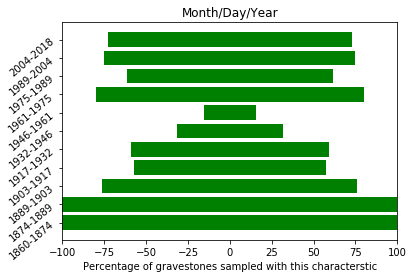

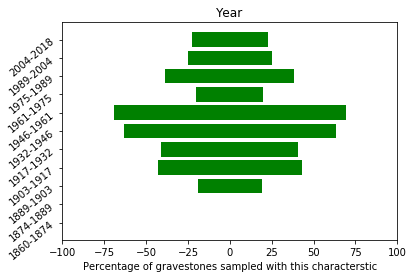

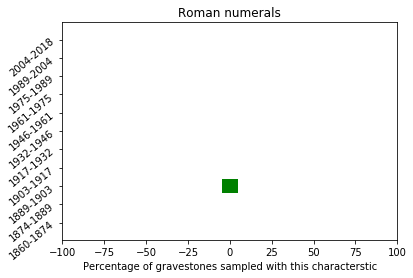

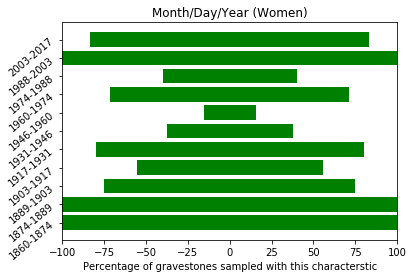

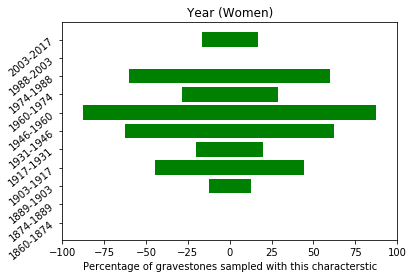

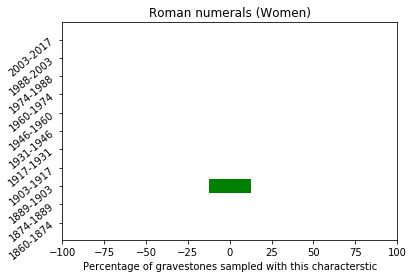

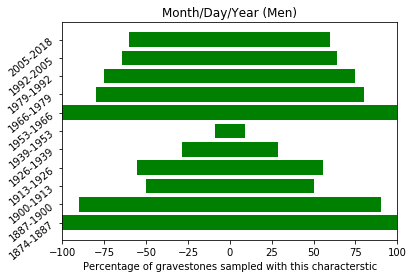

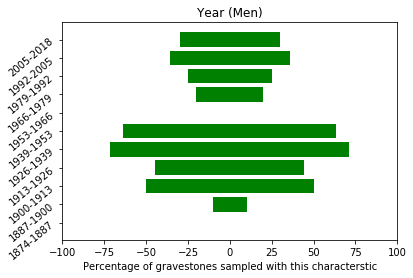

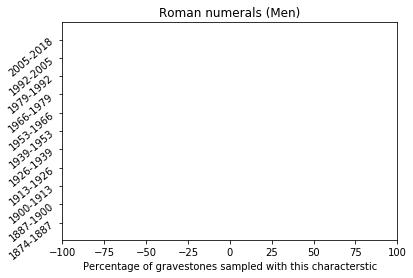

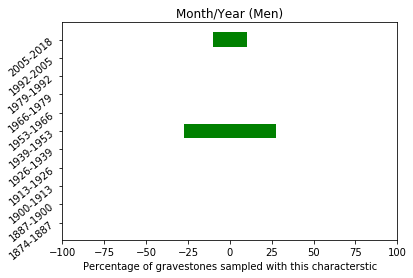

In [19]:
year = []
age = []
sex = []
mdy = []
yr = []
roman = []
my = []

f_csv = open( 'datesnew.csv', 'r')
readf = csv.reader( f_csv, delimiter = ',')
for row in readf:
    year.append(row[1])
    age.append(row[2])
    sex.append(row[3])
    mdy.append(row[6])
    yr.append(row[7])
    roman.append(row[8])
    my.append(row[9])
f_csv.close()

input_data = [year, age, sex, mdy, yr, roman, my]

#women
yearf = []
agef = []
sexf = []
mdyf = []
yrf = []
romanf = []
myf = []

for i in range(len(sex)):
    if sex[i] == 'F' or sex[i] == 'F ':
        yearf.append(year[i])
        sexf.append(sex[i])
        agef.append(age[i])
        mdyf.append(mdy[i])
        yrf.append(yr[i])
        romanf.append(roman[i])
        myf.append(my[i])

input_data_f = [yearf, agef, sexf, mdyf, yrf, romanf, myf]
print(input_data_f)
#men
yearm = []
agem = []
sexm = []
mdym = []
yrm = []
romanm = []
mym = []

for i in range(len(sex)):
    if sex[i] == 'M' or sex[i] == 'M ':
        yearm.append(year[i])
        agem.append(age[i])
        mdym.append(mdy[i])
        yrm.append(yr[i])
        romanm.append(roman[i])
        mym.append(my[i])

input_data_m = [yearm, agem, sexm, mdym, yrm, romanm, mym]


def data_transform_dates(input_data, bins):
    '''returns a seriation graph for the given data.
    Inputs:
        data: (array of your data) 
        increment: size of bins for seriation
        
    Output: data in proper format for seriation function'''
    
    year = input_data[0]
    for i in range(len(year)):
        year[i] = float(year[i])
    year = np.array(year)
    mdy = input_data[3]
    yr = input_data[4]
    roman = input_data[5]
    my = input_data[6]
    
    data = []
    bounds = np.linspace(float(year[0]), float(year[-1]), bins)
    
    for i in range(len(bounds)-1):
        start = []
        count = []
        end = []
        for yer in year:
            if yer < bounds[i]:
                start.append(1)
            if yer >= bounds[i] and yer <= bounds[i+1]:
                count.append(1)
            if yer <= bounds[i+1]:
                end.append(1)
        
        mdyb = mdy[len(start): len(end)]
        for n in range(len(mdyb)):
            mdyb[n] = float(mdyb[n])
        
        yrb = yr[len(start): len(end)]
        for n in range(len(yrb)):
            yrb[n] = float(yrb[n])
        
        romanb = roman[len(start): len(end)]
        for n in range(len(romanb)):
            romanb[n] = float(romanb[n])
        
        myb = my[len(start): len(end)]
        for n in range(len(myb)):
            myb[n] = float(myb[n])
        
        mdyc = sum(mdyb)
        yrc = sum(yrb)
        myc = sum(myb)
        romanc = sum(romanb)
        total = len(count)
        
        mdyp = (mdyc/total)*100
        yrp = (yrc/total)*100
        myp = (myc/total)*100
        romanp = (romanc/total)*100
        
        data_bound = ['{:.0f}-{:.0f}'.format(bounds[i], bounds[i+1]), mdyp, yrp, romanp, myp]
        data.append(data_bound)
        
    return data
            
data = data_transform_dates(input_data, 12)

labels = []
mdy = []
yr = []
roman = []
my = []
for d in data:
    labels.append(d[0])
    mdy.append(d[1])
    yr.append(d[2])
    roman.append(d[3])
    my.append(d[4])


#month/day/year
plt.barh(range(len(mdy)), np.array(mdy)*2, left = np.array(mdy)*-1, align='center', color='green')
plt.yticks(ticks = range(len(mdy)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Month/Day/Year')
plt.xlim(-100, 100)
plt.savefig('mdydate.png')

#Year
plt.figure()
plt.barh(range(len(yr)), np.array(yr)*2, left = np.array(yr)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(yr)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Year')
plt.xlim(-100, 100)
plt.savefig('yrdate.png')

#roman numerals
plt.figure()
plt.barh(range(len(roman)), np.array(roman)*2, left = np.array(roman)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(roman)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Roman numerals')
plt.xlim(-100, 100)
plt.savefig('romandates.png')

#month
plt.figure()
plt.barh(range(len(my)), np.array(my)*2, left = np.array(my)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(my)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Month/Year')
plt.xlim(-100, 100)
plt.savefig('mydate.png')

#writing data into a written file
f_csv1 = open( 'datesdata.csv', 'w')
SAWriter = csv.writer( f_csv1,                 
                           delimiter = ',',          
                           quotechar = '',           
                           quoting = csv.QUOTE_NONE )
SAWriter.writerow(['Dates Data'])
SAWriter.writerow(['Year Range', 'Number Sampled', 'M/D/Year Percentage', 'Year Percentage', 'Roman Numerals Percentage', 'M/Year Percentage'])
for i in range(len(labels)):
    SAWriter.writerow( [labels[i], totals[i], mdy[i], yr[i], roman[i], my[i]])
f_csv1.close()

#women
dataf = data_transform_dates(input_data_f, 12)

labels = []
mdy = []
yr = []
roman = []
my = []
for d in dataf:
    labels.append(d[0])
    mdy.append(d[1])
    yr.append(d[2])
    roman.append(d[3])
    my.append(d[4])


#month/day/year
plt.barh(range(len(mdy)), np.array(mdy)*2, left = np.array(mdy)*-1, align='center', color='green')
plt.yticks(ticks = range(len(mdy)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Month/Day/Year (Women)')
plt.xlim(-100, 100)
plt.savefig('mdydate_women.png')

#Year
plt.figure()
plt.barh(range(len(yr)), np.array(yr)*2, left = np.array(yr)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(yr)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Year (Women)')
plt.xlim(-100, 100)
plt.savefig('yrdate_women.png')

#roman numerals
plt.figure()
plt.barh(range(len(roman)), np.array(roman)*2, left = np.array(roman)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(roman)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Roman numerals (Women)')
plt.xlim(-100, 100)
plt.savefig('romandates_women.png')

#month
plt.figure()
plt.barh(range(len(my)), np.array(my)*2, left = np.array(my)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(my)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Month/Year (Women)')
plt.xlim(-100, 100)
plt.savefig('mydate_women.png')

#men
datam = data_transform_dates(input_data_m, 12)

labels = []
mdy = []
yr = []
roman = []
my = []
for d in datam:
    labels.append(d[0])
    mdy.append(d[1])
    yr.append(d[2])
    roman.append(d[3])
    my.append(d[4])


#month/day/year
plt.barh(range(len(mdy)), np.array(mdy)*2, left = np.array(mdy)*-1, align='center', color='green')
plt.yticks(ticks = range(len(mdy)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Month/Day/Year (Men)')
plt.xlim(-100, 100)
plt.savefig('mdydate_men.png')

#Year
plt.figure()
plt.barh(range(len(yr)), np.array(yr)*2, left = np.array(yr)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(yr)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Year (Men)')
plt.xlim(-100, 100)
plt.savefig('yrdate_men.png')

#roman numerals
plt.figure()
plt.barh(range(len(roman)), np.array(roman)*2, left = np.array(roman)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(roman)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Roman numerals (Men)')
plt.xlim(-100, 100)
plt.savefig('romandates_men.png')

#month
plt.figure()
plt.barh(range(len(my)), np.array(my)*2, left = np.array(my)*-1, align = 'center', color = 'green')
plt.yticks(ticks = range(len(my)), labels = labels, rotation = 40)
plt.xlabel('Percentage of gravestones sampled with this characterstic')
plt.title('Month/Year (Men)')
plt.xlim(-100, 100)
plt.savefig('mydate_men.png')
 